# PN2V Training
Here we will use the estimated noise model (from the notebooks ```1a_CreateNoiseModel_Calibration.ipynb``` or ```1b_CreateNoiseModel_Bootstrap.ipynb```) and train a PN2V network on single noisy images.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../../')
from ppn2v.unet.model import UNet
from ppn2v.pn2v import utils
from ppn2v.pn2v import gaussianMixtureNoiseModel
from ppn2v.pn2v import histNoiseModel
from ppn2v.pn2v import training
from tifffile import imread
import os
import urllib
import zipfile
import torch
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Load Data

Load the data that needs to be denoised. It is expected that you have downloaded the datasets and created a noise model (GMM- and  histogram- based) using the notebooks ```1a_CreateNoiseModel_Calibration.ipynb``` or ```1b_CreateNoiseModel_Bootstrap.ipynb```). Ensure that for `Mouse Actin`, the data to be denoised is named ```sample_attempt2.tif``` and not the diaphragm data. 

In [2]:
path='../../../data/Mouse actin/'
# Load the training data
data=imread(path+'sample_attempt2.tif')
dataName = 'mouseactin'

Uncomment the pertinent `nameNoiseModel` to choose the noiseModel of interest

In [3]:
 nameNoiseModel ='HistNoiseModel_'+dataName+'_'+'calibration'
# nameNoiseModel='GMMNoiseModel_'+dataName+'_'+str(3)+'_'+str(2)+'_'+'calibration'
# nameNoiseModel ='HistNoiseModel_'+dataName+'_'+'bootstrap'
# nameNoiseModel='GMMNoiseModel_'+dataName+'_'+str(3)+'_'+str(2)+'_'+'bootstrap'


In [4]:
namePN2VModel=nameNoiseModel
if('HistNoiseModel' in namePN2VModel):
    histogram = np.load(path+nameNoiseModel+'.npy') 
    noiseModel= histNoiseModel.NoiseModel(histogram, device=device)
elif('GMMNoiseModel' in namePN2VModel):
    params= np.load(path+nameNoiseModel+'.npz')
    noiseModel = gaussianMixtureNoiseModel.GaussianMixtureNoiseModel(params = params, device = device)
    

### Create the Network and Train it
This can take a while.

In [5]:
# Create a network with 800 output channels that are interpreted as samples from the prior.
net = UNet(800, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()
np.random.shuffle(my_train_data)
np.random.shuffle(my_val_data)

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix=namePN2VModel, directory=path, noiseModel=noiseModel,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=5, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3)

Epoch 0 finished      
avg. loss: 3.858033466339111+-(2SEM)0.22611348556023622      
Epoch 1 finished      
avg. loss: 3.875736105442047+-(2SEM)0.23904355456822385      
Epoch 2 finished      
avg. loss: 3.4179594039916994+-(2SEM)0.11267889669995967      
Epoch 3 finished      
avg. loss: 3.6056503772735597+-(2SEM)0.2041011801891784      
Epoch 4 finished      
avg. loss: 3.402130889892578+-(2SEM)0.1615159094223125      
Epoch 5 finished      
avg. loss: 3.4734688878059385+-(2SEM)0.18305724368640888      
Epoch 6 finished      
avg. loss: 3.250464987754822+-(2SEM)0.10716793126102439      
Epoch 7 finished      
avg. loss: 3.4284298181533814+-(2SEM)0.16595292803727876      
Epoch 8 finished      
avg. loss: 3.3929508090019227+-(2SEM)0.1400292585957574      
Epoch 9 finished      
avg. loss: 3.3049018144607545+-(2SEM)0.13765427482236303      
Epoch 10 finished      
avg. loss: 3.421878933906555+-(2SEM)0.1165878400952648      
Epoch 11 finished      
avg. loss: 3.3724369406700134+-(2SEM)0

Epoch 92 finished      
avg. loss: 3.451267087459564+-(2SEM)0.18096595913526708      
Epoch    92: reducing learning rate of group 0 to 1.5625e-05.
Epoch 93 finished      
avg. loss: 3.357820415496826+-(2SEM)0.15317484186086242      
Epoch 94 finished      
avg. loss: 3.4510559320449827+-(2SEM)0.17360677122688006      
Epoch 95 finished      
avg. loss: 3.471729099750519+-(2SEM)0.16283949781319026      
Epoch 96 finished      
avg. loss: 3.396216893196106+-(2SEM)0.1765908733000523      
Epoch 97 finished      
avg. loss: 3.3538113951683046+-(2SEM)0.1465526281144913      
Epoch 98 finished      
avg. loss: 3.3573458671569822+-(2SEM)0.1350956436232491      
Epoch 99 finished      
avg. loss: 3.3985066771507264+-(2SEM)0.1903142376736261      
Epoch 100 finished      
avg. loss: 3.329804015159607+-(2SEM)0.15687775645896332      
Epoch 101 finished      
avg. loss: 3.4317755699157715+-(2SEM)0.14307345845450836      
Epoch 102 finished      
avg. loss: 3.4708009004592895+-(2SEM)0.19007156198

Epoch 181 finished      
avg. loss: 3.418602979183197+-(2SEM)0.19229045404441794      
Epoch 182 finished      
avg. loss: 3.255471909046173+-(2SEM)0.1127825612135451      
Epoch 183 finished      
avg. loss: 3.3620378971099854+-(2SEM)0.14537794960764902      
Epoch 184 finished      
avg. loss: 3.5188397765159607+-(2SEM)0.1847555520315691      
Epoch 185 finished      
avg. loss: 3.446686840057373+-(2SEM)0.17732443543557655      
Epoch 186 finished      
avg. loss: 3.356493377685547+-(2SEM)0.18244086758781639      
Epoch 187 finished      
avg. loss: 3.4235056042671204+-(2SEM)0.19284492049139826      
Epoch 188 finished      
avg. loss: 3.4237940549850463+-(2SEM)0.16051659444056457      
Epoch 189 finished      
avg. loss: 3.4045032262802124+-(2SEM)0.15688307886842667      
Epoch 190 finished      
avg. loss: 3.4371310591697695+-(2SEM)0.1464735128502153      
Epoch 191 finished      
avg. loss: 3.372195613384247+-(2SEM)0.1611278645633819      
Epoch   191: reducing learning rate of gr

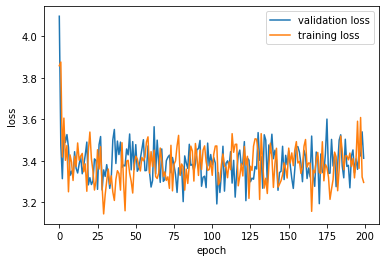

In [7]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()